In [66]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
dta = sm.datasets.fair.load_pandas().data


In [67]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [68]:
#data exploration
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [69]:
#groupby rate_marriage
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Text(0,0.5,'Frequency')

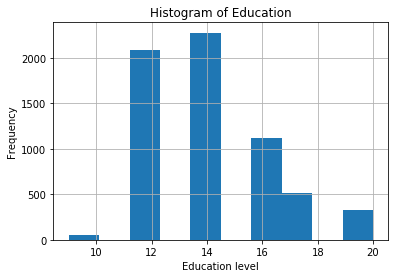

In [70]:
#show plots in notebook
%matplotlib inline
#histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education level')
plt.ylabel('Frequency')


Text(0,0.5,'Frequency')

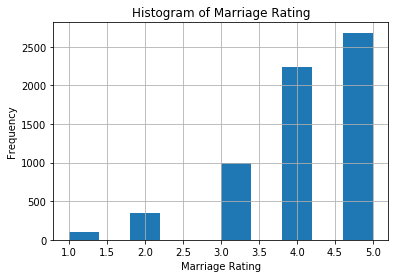

In [71]:
#histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'frequency')

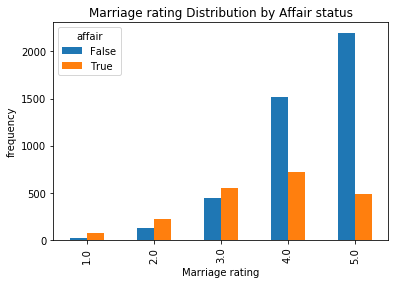

In [72]:
#barplot - marriage rating grouped by affair(true or false)
pd.crosstab(dta.rate_marriage,dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage rating Distribution by Affair status')
plt.xlabel('Marriage rating')
plt.ylabel('frequency')

Text(0,0.5,'%age')

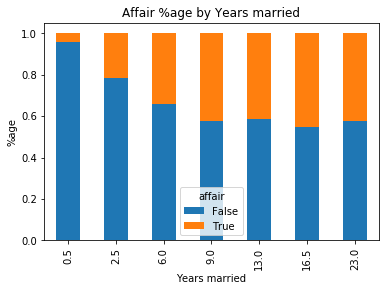

In [73]:
affair_yrs_married=pd.crosstab(dta.yrs_married,dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Affair %age by Years married')
plt.xlabel('Years married')
plt.ylabel('%age')

In [84]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
 religious + educ + C(occupation) + C(occupation_husb)',
 dta, return_type="dataframe")
X.columns




Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [75]:
#fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
 'C(occupation)[T.3.0]':'occ_3',
 'C(occupation)[T.4.0]':'occ_4',
 'C(occupation)[T.5.0]':'occ_5',
 'C(occupation)[T.6.0]':'occ_6',
 'C(occupation_husb)[T.2.0]':'occ_husb_2',
 'C(occupation_husb)[T.3.0]':'occ_husb_3',
 'C(occupation_husb)[T.4.0]':'occ_husb_4',
 'C(occupation_husb)[T.5.0]':'occ_husb_5',
 'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)#flatten y into a 1-D array
print (X.columns)

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')


In [76]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.7258875274897895

In [77]:
# what percentage had affairs?
y.mean()

0.3224945020420987

In [78]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.4898837940684415]
1,occ_2,[0.18804558415678518]
2,occ_3,[0.4989262655812233]
3,occ_4,[0.25064649147289303]
4,occ_5,[0.838982945050265]
5,occ_6,[0.8339212391042999]
6,occ_husb_2,[0.19054686815178645]
7,occ_husb_3,[0.2977445887809447]
8,occ_husb_4,[0.16131946301637926]
9,occ_husb_5,[0.18768301823819164]


In [79]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0
)
model2 = LogisticRegression()
model2.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
# predict class labels for the test set
predicted = model2.predict(X_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [57]:
# generate class probabilities
probs = model2.predict_proba(X_test)
probs


array([[0.35146331, 0.64853669],
       [0.90955083, 0.09044917],
       [0.72567332, 0.27432668],
       ...,
       [0.55727384, 0.44272616],
       [0.81207045, 0.18792955],
       [0.74734598, 0.25265402]])

In [81]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7298429319371728
0.745950606950631


In [62]:
#confusion matrix and a classification report with other metrics.
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))


[[1169  134]
 [ 382  225]]
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



In [82]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
        0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ]),
 0.7241630685514876)

In [83]:
#the probability of an affair for a random woman not present in the dataset. 
#She's a 25-year-old teacher who graduated college, has been married for 3 years, has 1 child, 
#rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,16]]))

array([[0.77472345, 0.22527655]])